In [1]:
import pandas as pd
import numpy as np
from lib.utility import get_text,ProcessPipeline
### Part 2 Package
from gensim import corpora, models
from IPython.display import Image
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: get raw text data 

In [2]:
### read pickle file
with open('outputs/step2_news_raw.pickle', 'rb') as handle:
    texts = pickle.load(handle)

In [3]:
pipeline = ProcessPipeline(texts)

textsProcessed = pipeline.run()

language is en
language is en
language is de
language is bg
Not able to detect language
language is en
language is vi
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is es
language is en
language is en
language is en
language is en
language is en
language is en
language is de
language is ar
language is en
language is en
language is es
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is es
language is en
Not able to detect language
language is en
language is en
language is en
Not able to detect language
Not able to detect language
language is en
language is en
Not able to detect language
language is en
language is en
language is en
Not able to detect language
language is en
language is en
language is en
Not able to detect language
language is en
language is en
language is en
language is ko
language is en
language 

language is es
language is en
language is en
language is es
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
Not able to detect language
Not able to detect language
Not able to detect language
Not able to detect language
language is en
language is en
language is en
language is en
Not able to detect language
language is pt
language is en
language is en
language is en
language is en
language is en
language is en
language is en
Not able to detect language
language is en
language is en
language is en
Not able to detect language
language is en
language is en
language is he
language is ko
language is en
language is en
Not able to detect language
language is en
language is it
language is en
language is en
language is en
language is en
language is en
language is en
language is es
Not able to detect language
language is en
language is en
language is en
language is en
language is en
language is en
language is e

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
Not able to detect language
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
Not able to detect language
Not able to detect language
language is hu
language is zh-cn
language is en
language is en
language is es
Not able to detect language
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is hu
language is en
Not able to detect language
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
Not able to detect language
language is en
lang

language is en
language is en
language is es
Not able to detect language
language is en
language is en
language is en
language is en
language is en
language is en
language is de
language is he
language is en
language is en
language is en
language is en
language is en
language is en
language is en
Not able to detect language
language is es
language is en
language is en
Not able to detect language
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
Not able to detect language
language is en
language is en
language is en
Not able to detect language
language is en
language is en
language is en
language is en
language is en
language is en
language is en
langu

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
Not able to detect language
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is hr
language is es
language is pt
language is cs
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is es
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is it
language is en
language is zh-tw
Not able to detect language
Not able to detect language
language is en
language is en
language is pt
language is e

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is pt
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is sv
language is en
language is en
language is pt
language is ru
Not able to detect language
language is en
language is en
language is en
language is en
language is en
Not able to detect language
language is en
language is en
Not able to detect language
language is hr
language is en
language is hr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is pt
language is en
language is en
language is en
Not able to detect language
language is en
language is en
language is en
language is en
language is en
Not able to detect language
language is en
language is en
language is en
language is en
language is en
language is en
langu

In [1]:
textsProcessed[0][:10]

NameError: name 'textsProcessed' is not defined

# Part 2: NLP analysis: topic modeling with LDA<br>

#### LDA intro:
LDA assumes that each document mix with various topics and every topic mix with various words.<br>
Documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution. In other words, LDA assumes a document is made from the following steps:

1. Determine the number of words in a document. Let’s say our document has 6 words.
2. Determine the mixture of topics in that document. For example, the document might contain 1/2 the topic “health” and 1/2 the topic “vegetables.”
3. Using each topic’s multinomial distribution, output words to fill the document’s word slots. In our example, the “health” topic is 1/2 our document, or 3 words. The “health” topic might have the word “diet” at 20% probability or “exercise” at 15%, so it will fill the document word slots based on those probabilities.

Given this assumption of how documents are created, LDA backtracks and tries to figure out what topics would create those documents in the first place



#### Intuitively, you can image that we have two layer of aggregations. 
1. First layer is the distribution of topics. 
> For example, we have finance news, weather news and political news. 
2. Second layer is distribution of words within the category. 
> For instance, we can find “sunny” and “cloud” in weather news while “money” and “stock” exists in finance news.

##### How doc is generated: 
- Based on topic distribution(θ), select topic t 
- Based on topic t, selecting corresponding word from ϕ.

Code steps:
1. Create unique dictionary for the texts, since we need to vectorize all docs: Detaisl: We will create dictionary for our texts. 
2. Constructing a document-term matrix: To generate an LDA model, we need to understand how frequently each term occurs within each document. To do that, we need to construct a document-term matrix with a package called gensim:

In [14]:
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel


In [15]:
"""
Create a dictionary from ‘textsProcessed’ containing the number of times a word appears in the training set.
The Dictionary() function traverses texts, assigning a unique integer id to each unique token while also collecting word counts and relevant statistics. 
    To see each token’s unique integer id, try print(dictionary.token2id).
""" 
dictionary = corpora.Dictionary(textsProcessed)

In [8]:
dictionary.token2id

{'C': 0,
 'CO': 1,
 'acidif': 2,
 'activ': 3,
 'address': 4,
 'also': 5,
 'among': 6,
 'anthropogen': 7,
 'articl': 8,
 'avail': 9,
 'beli': 10,
 'caus': 11,
 'chang': 12,
 'climat': 13,
 'concern': 14,
 'consensu': 15,
 'consumpt': 16,
 'continu': 17,
 'contribut': 18,
 'cyclon': 19,
 'degre': 20,
 'develop': 21,
 'drought': 22,
 'earth’': 23,
 'econom': 24,
 'electr': 25,
 'emiss': 26,
 'energi': 27,
 'etc': 28,
 'event': 29,
 'expect': 30,
 'extrem': 31,
 'fire': 32,
 'forest': 33,
 'forum': 34,
 'fuell': 35,
 'global': 36,
 'grid': 37,
 'grow': 38,
 'ice': 39,
 'includ': 40,
 'increas': 41,
 'indian': 42,
 'india’': 43,
 'issu': 44,
 'known': 45,
 'level': 46,
 'life': 47,
 'lifetim': 48,
 'link': 49,
 'live': 50,
 'loss': 51,
 'mean': 52,
 'million': 53,
 'no': 54,
 'not': 55,
 'one': 56,
 'particularli': 57,
 'polar': 58,
 'potenti': 59,
 'press': 60,
 'problem': 61,
 'public': 62,
 'read': 63,
 'research': 64,
 'rise': 65,
 'sea': 66,
 'solar': 67,
 'strongli': 68,
 'surfac': 69

In [10]:
### The doc2bow() function converts dictionary into a bag-of-words. The result, corpus, is a list of vectors equal to the number of documents. In each document vector is a series of tuples. As an example, print(corpus[0]) results in the following:
corpus = [dictionary.doc2bow(text) for text in textsProcessed]

In [11]:
### This list of tuples represents our first document, doc_a. The tuples are (term ID, term frequency) pairs, so if  print(dictionary.token2id) says brocolli’s id is 0, then the first tuple indicates that brocolli appeared twice in doc_a. doc2bow() only includes terms that actually occur: terms that do not occur in a document will not appear in that document’s vector.
print(corpus[0])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 4), (27, 4), (28, 1), (29, 2), (30, 1), (31, 2), (32, 1), (33, 1), (34, 2), (35, 1), (36, 5), (37, 1), (38, 1), (39, 1), (40, 1), (41, 4), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 3), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1)]


In [16]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

In [17]:
ldamodel.print_topics(num_topics=3, num_words=10)

[(0,
  '0.018*"new" + 0.017*"share" + 0.014*"democrat" + 0.013*"govern" + 0.012*"trump" + 0.012*"hous" + 0.010*"wall" + 0.010*"said" + 0.008*"money" + 0.008*"leader"'),
 (1,
  '0.014*"energi" + 0.008*"new" + 0.006*"year" + 0.006*"state" + 0.006*"power" + 0.006*"said" + 0.006*"compani" + 0.006*"renew" + 0.005*"solar" + 0.005*"climat"'),
 (2,
  '0.030*"hous" + 0.024*"new" + 0.020*"speaker" + 0.020*"democrat" + 0.020*"pelosi" + 0.020*"trump" + 0.016*"congress" + 0.015*"—" + 0.013*"govern" + 0.010*"senat"')]

### Evaluate LDA model based on Perplexity & Coherece Score

In [14]:
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=textsProcessed, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.162533486740683

Coherence Score:  0.526757813293636


In [18]:
### Check each document and its topics
for i in range(len(corpus)):
    tmpTopic = ldamodel[corpus[i]]
    print(f"For doc {i}, corresponding topics & probability are {tmpTopic}")

For doc 0, corresponding topics & probability are [(1, 0.99326086)]
For doc 1, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 3, corresponding topics & probability are [(1, 0.98517954)]
For doc 4, corresponding topics & probability are [(0, 0.11026672), (1, 0.8762814), (2, 0.013451916)]
For doc 5, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 6, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 7, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 8, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 9, corresponding topics & probability are [(0, 0.03162944), (1, 0.9370701), (2, 0.03130052)]
For doc 10, corresponding topics & probability ar

For doc 248, corresponding topics & probability are [(0, 0.13266097), (1, 0.7560521), (2, 0.11128691)]
For doc 249, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 250, corresponding topics & probability are [(0, 0.9955566)]
For doc 251, corresponding topics & probability are [(0, 0.9955564)]
For doc 252, corresponding topics & probability are [(0, 0.9954599)]
For doc 253, corresponding topics & probability are [(0, 0.9954612)]
For doc 254, corresponding topics & probability are [(0, 0.012091221), (1, 0.9767988), (2, 0.01110998)]
For doc 255, corresponding topics & probability are [(0, 0.7042401), (1, 0.01855106), (2, 0.27720886)]
For doc 256, corresponding topics & probability are [(0, 0.9949518)]
For doc 257, corresponding topics & probability are [(1, 0.99246186)]
For doc 258, corresponding topics & probability are [(1, 0.9987514)]
For doc 259, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)

For doc 420, corresponding topics & probability are [(0, 0.99413085)]
For doc 421, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 422, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 423, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 424, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 425, corresponding topics & probability are [(1, 0.98830116)]
For doc 426, corresponding topics & probability are [(0, 0.27659413), (1, 0.7155287)]
For doc 427, corresponding topics & probability are [(1, 0.9950042)]
For doc 428, corresponding topics & probability are [(0, 0.026474286), (1, 0.9512014), (2, 0.022324363)]
For doc 429, corresponding topics & probability are [(0, 0.15774141), (1, 0.83174664), (2, 0.010511935)]
For doc 430, corresponding topics & probability are [(0, 0.33333334), (1, 0.333

For doc 535, corresponding topics & probability are [(0, 0.087138124), (1, 0.9100081)]
For doc 536, corresponding topics & probability are [(0, 0.031629656), (1, 0.93706965), (2, 0.031300668)]
For doc 537, corresponding topics & probability are [(0, 0.04316954), (1, 0.9531997)]
For doc 538, corresponding topics & probability are [(1, 0.96701884), (2, 0.03175553)]
For doc 539, corresponding topics & probability are [(0, 0.16496998), (1, 0.83297753)]
For doc 540, corresponding topics & probability are [(1, 0.9789191), (2, 0.01859946)]
For doc 541, corresponding topics & probability are [(0, 0.03633798), (1, 0.95966846)]
For doc 542, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 543, corresponding topics & probability are [(0, 0.08040716), (1, 0.91869104)]
For doc 544, corresponding topics & probability are [(0, 0.017191354), (1, 0.9706889), (2, 0.0121197775)]
For doc 545, corresponding topics & probability are [(1, 0.9566652), (2, 0.03

For doc 657, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 658, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 659, corresponding topics & probability are [(0, 0.9950618)]
For doc 660, corresponding topics & probability are [(0, 0.9950589)]
For doc 661, corresponding topics & probability are [(0, 0.99505854)]
For doc 662, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 663, corresponding topics & probability are [(0, 0.9954599)]
For doc 664, corresponding topics & probability are [(0, 0.015676288), (1, 0.9705537), (2, 0.013770049)]
For doc 665, corresponding topics & probability are [(1, 0.99593085)]
For doc 666, corresponding topics & probability are [(0, 0.9941938)]
For doc 667, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 668, corresponding topics & probability are [(0, 0.0104

For doc 755, corresponding topics & probability are [(0, 0.04254366), (1, 0.9554708)]
For doc 756, corresponding topics & probability are [(0, 0.995523)]
For doc 757, corresponding topics & probability are [(0, 0.9950621)]
For doc 758, corresponding topics & probability are [(0, 0.9950613)]
For doc 759, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 760, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 761, corresponding topics & probability are [(0, 0.055884328), (1, 0.8855155), (2, 0.058600124)]
For doc 762, corresponding topics & probability are [(0, 0.9954606)]
For doc 763, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 764, corresponding topics & probability are [(0, 0.02340888), (1, 0.9581396), (2, 0.018451536)]
For doc 765, corresponding topics & probability are [(0, 0.030518651), (1, 0.9398206), (2, 0.02966071)]
For doc 766, c

For doc 862, corresponding topics & probability are [(0, 0.02820972), (1, 0.85696363), (2, 0.11482663)]
For doc 863, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 864, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 865, corresponding topics & probability are [(0, 0.5446149), (1, 0.2606776), (2, 0.19470754)]
For doc 866, corresponding topics & probability are [(0, 0.010189605), (1, 0.9796941), (2, 0.010116267)]
For doc 867, corresponding topics & probability are [(1, 0.9936704)]
For doc 868, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 869, corresponding topics & probability are [(0, 0.9888779)]
For doc 870, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 871, corresponding topics & probability are [(1, 0.98276085)]
For doc 872, corresponding topics & probability are [(0, 0.333333

For doc 996, corresponding topics & probability are [(0, 0.9952767)]
For doc 997, corresponding topics & probability are [(0, 0.99555665)]
For doc 998, corresponding topics & probability are [(0, 0.9021498), (2, 0.09585884)]
For doc 999, corresponding topics & probability are [(0, 0.08409989), (1, 0.9084375)]
For doc 1000, corresponding topics & probability are [(0, 0.07316444), (1, 0.268356), (2, 0.6584796)]
For doc 1001, corresponding topics & probability are [(0, 0.08556799), (1, 0.30720812), (2, 0.60722387)]
For doc 1002, corresponding topics & probability are [(0, 0.99666333)]
For doc 1003, corresponding topics & probability are [(0, 0.9247401), (1, 0.072215386)]
For doc 1004, corresponding topics & probability are [(1, 0.7890534), (2, 0.20692141)]
For doc 1005, corresponding topics & probability are [(1, 0.99071896)]
For doc 1006, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 1007, corresponding topics & probability are [(0, 0.

For doc 1196, corresponding topics & probability are [(1, 0.9672143), (2, 0.03189016)]
For doc 1197, corresponding topics & probability are [(0, 0.05088305), (1, 0.90724766), (2, 0.041869342)]
For doc 1198, corresponding topics & probability are [(1, 0.97651225), (2, 0.021462664)]
For doc 1199, corresponding topics & probability are [(1, 0.9855696)]
For doc 1200, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 1201, corresponding topics & probability are [(1, 0.9788528), (2, 0.013318198)]
For doc 1202, corresponding topics & probability are [(0, 0.99527854)]
For doc 1203, corresponding topics & probability are [(1, 0.99726737)]
For doc 1204, corresponding topics & probability are [(1, 0.9691623), (2, 0.025692942)]
For doc 1205, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 1206, corresponding topics & probability are [(0, 0.98829323)]
For doc 1207, corresponding topics & probability 

For doc 1385, corresponding topics & probability are [(2, 0.99487656)]
For doc 1386, corresponding topics & probability are [(0, 0.6505799), (1, 0.16750586), (2, 0.18191423)]
For doc 1387, corresponding topics & probability are [(2, 0.9958201)]
For doc 1388, corresponding topics & probability are [(2, 0.9965259)]
For doc 1389, corresponding topics & probability are [(2, 0.99682164)]
For doc 1390, corresponding topics & probability are [(2, 0.9968226)]
For doc 1391, corresponding topics & probability are [(2, 0.99652565)]
For doc 1392, corresponding topics & probability are [(2, 0.9965101)]
For doc 1393, corresponding topics & probability are [(2, 0.997179)]
For doc 1394, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 1395, corresponding topics & probability are [(1, 0.99414855)]
For doc 1396, corresponding topics & probability are [(2, 0.99632394)]
For doc 1397, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334),

For doc 1625, corresponding topics & probability are [(0, 0.55384797), (1, 0.21172221), (2, 0.23442984)]
For doc 1626, corresponding topics & probability are [(2, 0.9953608)]
For doc 1627, corresponding topics & probability are [(2, 0.99536145)]
For doc 1628, corresponding topics & probability are [(2, 0.9953612)]
For doc 1629, corresponding topics & probability are [(2, 0.9953612)]
For doc 1630, corresponding topics & probability are [(2, 0.9953612)]
For doc 1631, corresponding topics & probability are [(2, 0.9953609)]
For doc 1632, corresponding topics & probability are [(2, 0.9953612)]
For doc 1633, corresponding topics & probability are [(2, 0.9953612)]
For doc 1634, corresponding topics & probability are [(0, 0.13285309), (1, 0.75543743), (2, 0.111709476)]
For doc 1635, corresponding topics & probability are [(0, 0.021468146), (1, 0.9572381), (2, 0.021293795)]
For doc 1636, corresponding topics & probability are [(0, 0.2203893), (1, 0.64215297), (2, 0.13745777)]
For doc 1637, corr

For doc 1788, corresponding topics & probability are [(2, 0.99646366)]
For doc 1789, corresponding topics & probability are [(2, 0.996525)]
For doc 1790, corresponding topics & probability are [(0, 0.11045565), (1, 0.3251719), (2, 0.5643725)]
For doc 1791, corresponding topics & probability are [(2, 0.9965426)]
For doc 1792, corresponding topics & probability are [(1, 0.8905004), (2, 0.10665113)]
For doc 1793, corresponding topics & probability are [(0, 0.029496776), (1, 0.9420354), (2, 0.028467894)]
For doc 1794, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 1795, corresponding topics & probability are [(1, 0.98245746), (2, 0.0131875165)]
For doc 1796, corresponding topics & probability are [(1, 0.9981912)]
For doc 1797, corresponding topics & probability are [(2, 0.99536103)]
For doc 1798, corresponding topics & probability are [(2, 0.99536115)]
For doc 1799, corresponding topics & probability are [(2, 0.9953612)]
For doc 1800, cor

For doc 1912, corresponding topics & probability are [(0, 0.042482235), (1, 0.5877403), (2, 0.36977747)]
For doc 1913, corresponding topics & probability are [(1, 0.99486274)]
For doc 1914, corresponding topics & probability are [(1, 0.9879838)]
For doc 1915, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 1916, corresponding topics & probability are [(0, 0.033342816), (2, 0.96537757)]
For doc 1917, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 1918, corresponding topics & probability are [(1, 0.9913949)]
For doc 1919, corresponding topics & probability are [(0, 0.016804837), (1, 0.9654645), (2, 0.017730748)]
For doc 1920, corresponding topics & probability are [(0, 0.18743108), (1, 0.80360395)]
For doc 1921, corresponding topics & probability are [(1, 0.9977886)]
For doc 1922, corresponding topics & probability are [(0, 0.18743819), (1, 0.8035967)]
For doc 1923, corresponding topics

For doc 2034, corresponding topics & probability are [(1, 0.9509964), (2, 0.04350955)]
For doc 2035, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2036, corresponding topics & probability are [(1, 0.82513815), (2, 0.16995956)]
For doc 2037, corresponding topics & probability are [(0, 0.015196204), (1, 0.97211415), (2, 0.012689651)]
For doc 2038, corresponding topics & probability are [(0, 0.01431382), (1, 0.79494333), (2, 0.19074282)]
For doc 2039, corresponding topics & probability are [(0, 0.09833086), (1, 0.86203307), (2, 0.039636064)]
For doc 2040, corresponding topics & probability are [(1, 0.82564014), (2, 0.16836067)]
For doc 2041, corresponding topics & probability are [(1, 0.88520414), (2, 0.11166986)]
For doc 2042, corresponding topics & probability are [(0, 0.06322762), (1, 0.8644462), (2, 0.07232613)]
For doc 2043, corresponding topics & probability are [(0, 0.3996076), (1, 0.23709488), (2, 0.36329755)]
For doc 2044, corr

For doc 2130, corresponding topics & probability are [(0, 0.32019237), (1, 0.67227614)]
For doc 2131, corresponding topics & probability are [(1, 0.9957646)]
For doc 2132, corresponding topics & probability are [(0, 0.995697)]
For doc 2133, corresponding topics & probability are [(0, 0.048886534), (1, 0.9040384), (2, 0.04707501)]
For doc 2134, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2135, corresponding topics & probability are [(1, 0.98994935)]
For doc 2136, corresponding topics & probability are [(1, 0.9904661)]
For doc 2137, corresponding topics & probability are [(1, 0.9869801)]
For doc 2138, corresponding topics & probability are [(1, 0.98210245), (2, 0.01603014)]
For doc 2139, corresponding topics & probability are [(0, 0.088865526), (1, 0.82753485), (2, 0.08359968)]
For doc 2140, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2141, corresponding topics & probability are 

For doc 2236, corresponding topics & probability are [(1, 0.88520354), (2, 0.11166849)]
For doc 2237, corresponding topics & probability are [(0, 0.029768378), (1, 0.90932655), (2, 0.060905103)]
For doc 2238, corresponding topics & probability are [(1, 0.8882874), (2, 0.10970967)]
For doc 2239, corresponding topics & probability are [(1, 0.9914287)]
For doc 2240, corresponding topics & probability are [(1, 0.99428535)]
For doc 2241, corresponding topics & probability are [(1, 0.4727245), (2, 0.52029365)]
For doc 2242, corresponding topics & probability are [(1, 0.9960319)]
For doc 2243, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2244, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2245, corresponding topics & probability are [(1, 0.9945012)]
For doc 2246, corresponding topics & probability are [(0, 0.99430853)]
For doc 2247, corresponding topics & probability are [(1, 0.8611551),

For doc 2350, corresponding topics & probability are [(2, 0.9966159)]
For doc 2351, corresponding topics & probability are [(2, 0.9961943)]
For doc 2352, corresponding topics & probability are [(2, 0.9967801)]
For doc 2353, corresponding topics & probability are [(2, 0.9967801)]
For doc 2354, corresponding topics & probability are [(2, 0.99688345)]
For doc 2355, corresponding topics & probability are [(2, 0.9968408)]
For doc 2356, corresponding topics & probability are [(2, 0.9968409)]
For doc 2357, corresponding topics & probability are [(2, 0.99678504)]
For doc 2358, corresponding topics & probability are [(2, 0.99678576)]
For doc 2359, corresponding topics & probability are [(2, 0.99678504)]
For doc 2360, corresponding topics & probability are [(2, 0.9967853)]
For doc 2361, corresponding topics & probability are [(0, 0.030527925), (1, 0.9398121), (2, 0.02965998)]
For doc 2362, corresponding topics & probability are [(2, 0.9966155)]
For doc 2363, corresponding topics & probability ar

For doc 2477, corresponding topics & probability are [(0, 0.031629402), (1, 0.93706995), (2, 0.031300645)]
For doc 2478, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2479, corresponding topics & probability are [(0, 0.9931211)]
For doc 2480, corresponding topics & probability are [(0, 0.18207918), (1, 0.81536114)]
For doc 2481, corresponding topics & probability are [(1, 0.9943958)]
For doc 2482, corresponding topics & probability are [(1, 0.9965809)]
For doc 2483, corresponding topics & probability are [(1, 0.99681014)]
For doc 2484, corresponding topics & probability are [(0, 0.35335174), (1, 0.63997585)]
For doc 2485, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2486, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2487, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2488, co

For doc 2585, corresponding topics & probability are [(0, 0.02469194), (1, 0.95370984), (2, 0.021598225)]
For doc 2586, corresponding topics & probability are [(1, 0.9564023), (2, 0.041471142)]
For doc 2587, corresponding topics & probability are [(0, 0.123862535), (1, 0.7649743), (2, 0.11116321)]
For doc 2588, corresponding topics & probability are [(0, 0.10276569), (1, 0.8336574), (2, 0.063576944)]
For doc 2589, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2590, corresponding topics & probability are [(1, 0.9948118)]
For doc 2591, corresponding topics & probability are [(1, 0.99761885)]
For doc 2592, corresponding topics & probability are [(1, 0.97675824), (2, 0.022089804)]
For doc 2593, corresponding topics & probability are [(1, 0.95898885), (2, 0.037020694)]
For doc 2594, corresponding topics & probability are [(1, 0.9878264)]
For doc 2595, corresponding topics & probability are [(0, 0.038363922), (1, 0.9491398), (2, 0.01249632

For doc 2757, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2758, corresponding topics & probability are [(0, 0.022959214), (1, 0.9746904)]
For doc 2759, corresponding topics & probability are [(0, 0.02296459), (1, 0.97468513)]
For doc 2760, corresponding topics & probability are [(1, 0.8242078), (2, 0.1747127)]
For doc 2761, corresponding topics & probability are [(0, 0.09180989), (1, 0.8459784), (2, 0.06221174)]
For doc 2762, corresponding topics & probability are [(1, 0.99358463)]
For doc 2763, corresponding topics & probability are [(0, 0.042482268), (1, 0.58774024), (2, 0.36977747)]
For doc 2764, corresponding topics & probability are [(0, 0.014807852), (1, 0.98371)]
For doc 2765, corresponding topics & probability are [(1, 0.9871244), (2, 0.010349744)]
For doc 2766, corresponding topics & probability are [(0, 0.04391678), (1, 0.9142611), (2, 0.04182209)]
For doc 2767, corresponding topics & probability are [(0, 0.03465601), (1,

For doc 2973, corresponding topics & probability are [(0, 0.03825859), (1, 0.95808345)]
For doc 2974, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2975, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2976, corresponding topics & probability are [(0, 0.99417734)]
For doc 2977, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2978, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2979, corresponding topics & probability are [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
For doc 2980, corresponding topics & probability are [(1, 0.9910328)]
For doc 2981, corresponding topics & probability are [(1, 0.9910352)]
For doc 2982, corresponding topics & probability are [(0, 0.0121729355), (1, 0.9763252), (2, 0.011501829)]
For doc 2983, corresponding topics & probability are [(0, 0.8584966),

### Visualize topics-keyword

##### Notation
- Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.
- A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.
- A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

In [19]:
# Visualize the topics
from pyLDAvis import gensim as pyLDAvis_gensim
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis_gensim.prepare(ldamodel, corpus, dictionary)
vis

/Users/zili/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.215070 -0.123760       1        1  57.422054
2      0.260863 -0.068316       2        1  26.810774
0     -0.045793  0.192077       3        1  15.767172, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
141   Default  3002.000000        hous  3002.000000  30.0000  30.0000
2785  Default  1581.000000     speaker  1581.000000  29.0000  29.0000
3348  Default  1560.000000      pelosi  1560.000000  28.0000  28.0000
807   Default  2277.000000    democrat  2277.000000  27.0000  27.0000
2039  Default  2125.000000       trump  2125.000000  26.0000  26.0000
400   Default  1240.000000    congress  1240.000000  25.0000  25.0000
263   Default   977.000000       share   977.000000  24.0000  24.0000
150   Default  4077.000000         new  4077.000000  23.0000  23.0000
979   Default  1926.000000      govern  1926.000000  22.0000  22.0000
923   Default  1528.000000           —  1528.000000  21.0000  21.0000
2197  Default   774.000000       parti   774.000000  20.0000  20.0000
1339  Default   849.000000      return   849.000000  19.0000  19.0000
1861  Default   788.000000        wall   788.000000  18.0000  18.0000
892   Default  1305.000000      leader  1305.000000  17.0000  17.0000
3337  Default   929.000000       senat   929.000000  16.0000  16.0000
1182  Default   805.000000    challeng   805.000000  15.0000  15.0000
27    Default  2575.000000      energi  2575.000000  14.0000  14.0000
2313  Default   654.000000     histori   654.000000  13.0000  13.0000
1332  Default   559.000000       readi   559.000000  12.0000  12.0000
270   Default   850.000000          th   850.000000  11.0000  11.0000
254   Default   620.000000        rate   620.000000  10.0000  10.0000
267   Default   458.000000       stock   458.000000   9.0000   9.0000
3027  Default   651.000000      border   651.000000   8.0000   8.0000
987   Default   642.000000       money   642.000000   7.0000   7.0000
129   Default  1046.000000      demand  1046.000000   6.0000   6.0000
1052  Default   352.000000     quarter   352.000000   5.0000   5.0000
3038  Default   369.000000      reopen   369.000000   4.0000   4.0000
3345  Default   771.000000       white   771.000000   3.0000   3.0000
2462  Default   533.000000       nanci   533.000000   2.0000   2.0000
249   Default   920.000000       offic   920.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
778    Topic3   278.945953     without   384.772919   1.5256  -5.1166
1861   Topic3   482.612335        wall   788.421631   1.3564  -4.5684
822    Topic3   269.997192       incom   372.691559   1.5249  -5.1492
987    Topic3   383.655487       money   642.744141   1.3312  -4.7979
680    Topic3   203.471939         own   279.226349   1.5307  -5.4321
234    Topic3   184.511856        hold   244.368439   1.5663  -5.5299
254    Topic3   332.603210        rate   620.379639   1.2239  -4.9407
3027   Topic3   341.336548      border   651.469604   1.2009  -4.9148
307    Topic3   306.590302        vote   580.661743   1.2086  -5.0221
979    Topic3   607.603210      govern  1926.707275   0.6932  -4.3381
807    Topic3   653.281311    democrat  2277.572266   0.5984  -4.2656
2039   Topic3   578.748047       trump  2125.113525   0.5465  -4.3868
150    Topic3   815.214294         new  4077.720947   0.2374  -4.0442
3338   Topic3   286.491272    shutdown   598.291870   1.1109  -5.0899
707    Topic3   175.576950    campaign   246.989655   1.5060  -5.5796
612    Topic3   183.862549        valu   270.248413   1.4621  -5.5334
160    Topic3   196.050842         set   305.768494   1.4028  -5.4693
692    Topic3   167.474091         inc   230.335358   1.5285  -5.6268
106    Topic3   466.383820        said  1744.878662   0.5278  -4.6026
258    Topic3   278.505127      report   652.39

### Find the optimal number of topics 

In [20]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Func:
        Compute c_v coherence for various number of topics
    Input:
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        limit : Max num of topics
    Returns:
        model_list : List of LDA topic models
        coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary)
#         model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [21]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=textsProcessed, start=2, limit=40, step=6)

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/zili/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

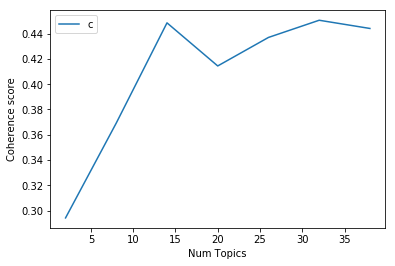

In [25]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Part 3: Modulize

In [26]:
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel
from pyLDAvis import gensim as pyLDAvis_gensim
import pyLDAvis

class LDA:
    def __init__(self,texts,num_topics=3):
        ### input texts: list of texts eg: [["jason","while"],["bay","wheel"]]
        self.texts = texts
        self.dictionary = corpora.Dictionary(texts)
        self.corpus = [self.dictionary.doc2bow(text) for text in texts]
        
        self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=num_topics, id2word = self.dictionary, passes=20)
        
    def get_topics(self,num_topics=3,num_words=5):
        topics = self.ldamodel.print_topics(num_topics=num_topics, num_words=num_words)
        print(f"topics: {topics}")
    def get_doc_topics(self,docId=0,print_topics=False):
        tmpTopic = self.ldamodel[self.corpus[docId]]
        if print_topics: print(f"For doc {docId}, corresponding topics & probability are {tmpTopic}")
        return tmpTopic
    
    def get_perplexity(self):
        return self.ldamodel.log_perplexity(self.corpus)  # a measure of how good the model is. lower the better.

    def get_coherence(self):
        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=self.ldamodel, texts=self.texts, dictionary=self.dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        print('\nCoherence Score: ', coherence_lda)
        return self.coherence_lda

    def plot(self):
        # Visualize the topics
        pyLDAvis.enable_notebook()
        vis = pyLDAvis_gensim.prepare(self.ldamodel,self.corpus, self.dictionary)
        return vis